# Demo 3

> Test Fast.ai models with a simple supervised learning test


In [1]:
# | default_exp demo.demo4

In [2]:
!gpustat

merlin                      Fri Jul 21 13:29:33 2023  525.116.04
[0] NVIDIA GeForce RTX 4090 | 48°C,   2 % |  1704 / 24564 MB | biagio(390M) biagio(239M) biagio(36M)
[1] NVIDIA GeForce RTX 4090 | 47°C,   0 % |     8 / 24564 MB | biagio(4M)


In [3]:
#| hide
from nbdev.showdoc import *

%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

from Noise2Model.core import *

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [4]:
bs, size = 4, 512
# arch = models.resnet34
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
path_train_gt = Path(path/"gt")

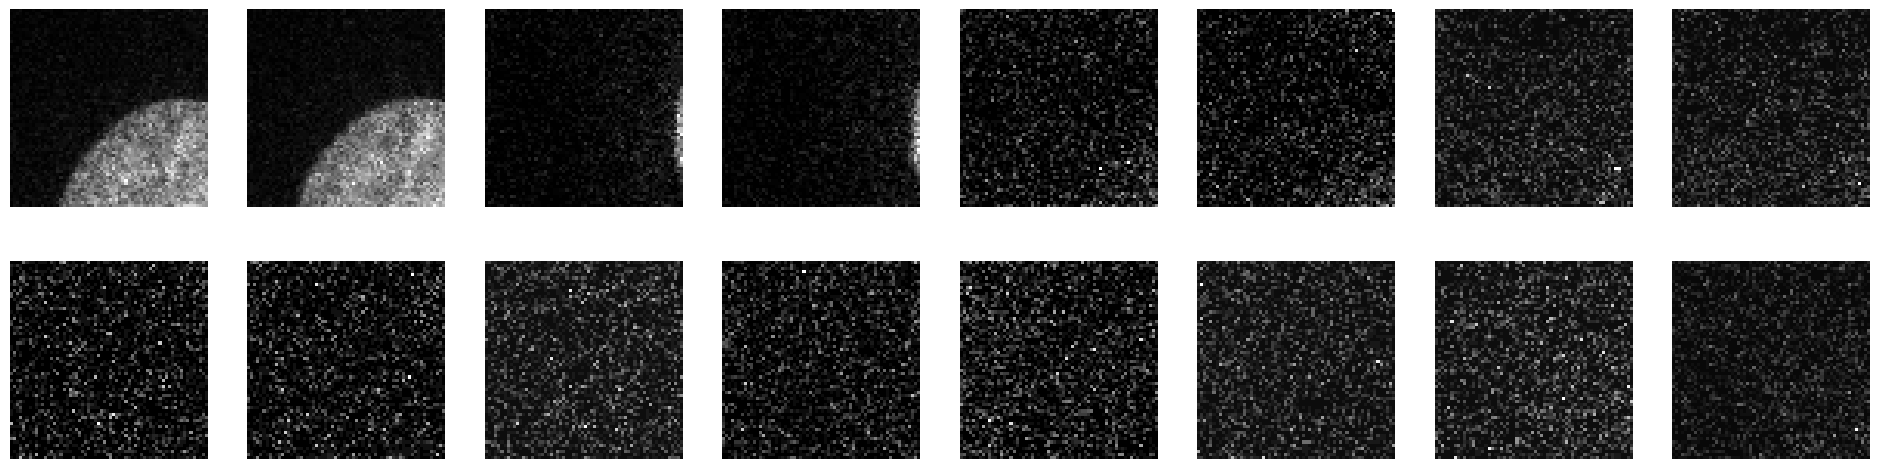

In [5]:
dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                   get_items=get_image_files,
                   get_y=get_noisy_pair,
                   splitter=RandomSplitter(valid_pct=0.2),
                   item_tfms=RandomCrop(64),
                   )
# dblock.summary(path_train_raw)
# dsets = dblock.datasets(path_train_raw)
# dsets.train[0]
dls = dblock.dataloaders(path_train_raw)
dls.show_batch(max_n=8, cmap='gray')

In [6]:
x,y = dls.one_batch()
x_shape = (x.shape)
print(x_shape)


torch.Size([64, 1, 64, 64])


In [7]:
from Noise2Model.noise2noiseflow import Noise2NoiseFlow
from Noise2Model.models import UNet

In [10]:
net = Noise2NoiseFlow(x_shape[1:], arch='sdn', denoiser=UNet(1))
z, objective, denoised = net.forward(x.to('cpu'))
test_eq(denoised.shape, x.shape)

|-SignalDependant


In [17]:
learn = Learner(dls, net, loss_func=F.l1_loss)
learn.summary()

RuntimeError: The size of tensor a (64) must match the size of tensor b (512) at non-singleton dimension 3

In [ ]:
learn.show_training_loop()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(50, lr_max=1e-03)

In [ ]:
learn.show_results(max_n=10, cmap='gray')

In [ ]:
# | hide
import nbdev
nbdev.nbdev_export()